# Iris Dataset

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## 1. Define the problem

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

<img src="http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/04/iris_petal_sepal.png">

## 2. Understanding and prepearing data

### Loading Iris datset from sklearn

In [2]:
#importing pandas
import pandas as pd

In [3]:
iris = pd.read_csv("Data/iris.data", names=["sepal length", "sepal width", "petal length", "petal width", "Class"])

In [4]:
iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualization

In [6]:
import seaborn as sns
%matplotlib inline

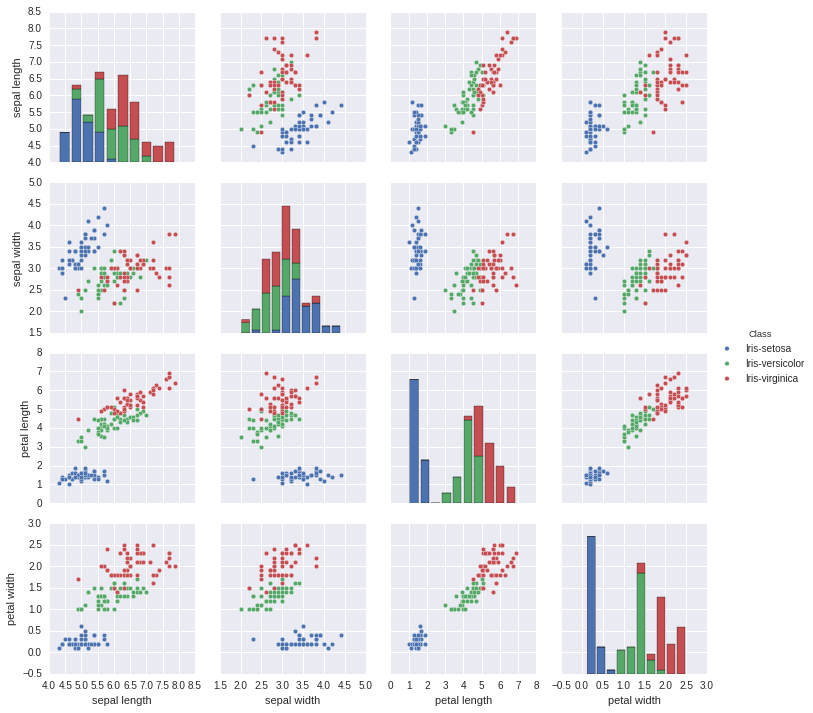

In [7]:
sns.pairplot(iris, hue="Class")

### Preparing data

In [8]:
X = iris[["sepal length", "sepal width", "petal length", "petal width"]]
Y = iris["Class"]

## 3. Spot check algorithms

### Cross validation

In [9]:
from sklearn.cross_validation import train_test_split, KFold
import numpy as np

In [10]:
#cross validation
#X_train, X_test, y_train, y_test = train_test_split(X, Y)
#kfold
kf = KFold(n_folds=10, n=Y.shape[0])

### Benchmarking function

In [11]:
from time import time
#kFold
def spotCheckKFold(clf, name, kfold):
    print('=' * 80)
    print(name)
    print('_' * 80)
    print("Training: ")
    print(clf)
        
    train_times =  []
    test_times =  []
    accuracies = []
    
    #kofol validation
    for train_index, test_index in kfold:
        #spliting dataset
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        #training
        t0 = time()
        clf.fit(X_train, y_train)
        train_times.append(time() - t0)
        
        #predicting
        t0 = time()
        pred = clf.predict(X_test)
        test_times.append(time() - t0)
        
        #calculating accuracy
        accuracies.append( metrics.accuracy_score(y_test, pred))
        
        
        
     
    train_time = sum(train_times) / float(len(train_times))
    print("train time: %0.3fs" % train_time)
   
    test_time = sum(test_times) / float(len(test_times))
    print("test time:  %0.3fs" % test_time)

    score = sum(accuracies) / float(len(accuracies))
    print("accuracy:   %0.3f" % score)
        
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    
    
    return clf_descr, score, train_time, test_time, accuracies

### Prepearing pipeline

In [12]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline

estimators = [
        #Linear models
        #(LogisticRegression(), "Logistic Regression"),
        #(RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
        #SVM
        (SVC(kernel="linear", C=0.025), "Linear SVM"),
        #LDA i QDA
        (LinearDiscriminantAnalysis(), "LDA"),
        (QuadraticDiscriminantAnalysis(), "QDA"),
        #KNN
        #(KNeighborsClassifier(n_neighbors=10), "kNN 10"),
        (KNeighborsClassifier(n_neighbors=5), "kNN 5"),
        (KNeighborsClassifier(n_neighbors=1), "kNN 1"),
        #Tree based
        (RandomForestClassifier(n_estimators=10), "Random forest"),
        #(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=50), "AdaBoost"),
        #(ExtraTreesClassifier(n_estimators=50), "ExtraTree"),
        #Bayes
        #(BernoulliNB(alpha=.01), "BernoulliNB"),
        #(MultinomialNB(alpha=.01), "MultinomialNB"),
        (GaussianNB(), "Bayes")
]

### Fitting classifieres

In [13]:
results = []
for clf, name in estimators:
    results.append( spotCheckKFold(clf, name, kf) )

Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, class_weight=None, fit_intercept=True,
              loss='hinge', n_iter=50, n_jobs=1, random_state=None,
              shuffle=True, verbose=0, warm_start=False)
train time: 0.002s
test time:  0.000s
accuracy:   0.807
confusion matrix:
[[15]]

Linear SVM
________________________________________________________________________________
Training: 
SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
train time: 0.001s
test time:  0.000s
accuracy:   0.867
confusion matrix:
[[ 0  0]
 [ 4 11]]

LDA
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
           

/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


train time: 0.001s
test time:  0.001s
accuracy:   0.933
confusion matrix:
[[15]]

kNN 1
________________________________________________________________________________
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
train time: 0.001s
test time:  0.001s
accuracy:   0.960
confusion matrix:
[[15]]

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
train time: 0.020s
test time:  0.002s
accuracy:   0.940
confusion matrix:
[[ 0  0]
 [ 1 14]]

Bayes
___________

### Visualtization results

In [14]:
#importing neccesary libraries
import matplotlib.pyplot as plt

#### Accuratcy box plot
Box-plots are very useful for summarizing the distribution of accuracy results for each algorithm and dataset pair.

In [15]:
import seaborn as sns
acc_table = [x[4] for x in results]
acc = pd.DataFrame(acc_table).transpose()
#classificators names
est_names = [x[1] for x in estimators]
acc.columns=est_names
acc.describe()

,Passive-Aggressive,Linear SVM,LDA,QDA,kNN 5,kNN 1,Random forest,Bayes
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.806667,0.866667,0.966667,0.966667,0.933333,0.960000,0.940000,0.946667
std,0.246356,0.129577,0.064788,0.064788,0.088889,0.056218,0.073367,0.061262
min,0.266667,0.666667,0.800000,0.800000,0.800000,0.866667,0.800000,0.866667
25%,0.733333,0.750000,0.950000,0.950000,0.866667,0.933333,0.883333,0.883333
50%,0.900000,0.866667,1.000000,1.000000,1.000000,1.000000,0.966667,0.966667
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
acc.head(15)

,Passive-Aggressive,Linear SVM,LDA,QDA,kNN 5,kNN 1,Random forest,Bayes
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.733333,0.866667,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333
4,0.933333,0.866667,0.933333,0.800000,0.800000,0.866667,0.933333,0.933333
5,0.533333,0.733333,0.933333,0.933333,0.866667,0.933333,0.866667,0.866667
6,0.866667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.733333,0.800000,1.000000,1.000000,0.866667,0.866667,0.866667,0.866667
8,0.266667,0.666667,0.800000,0.933333,0.800000,0.933333,0.800000,0.866667
9,1.000000,0.733333,1.000000,1.000000,1.000000,1.000000,0.933333,1.000000


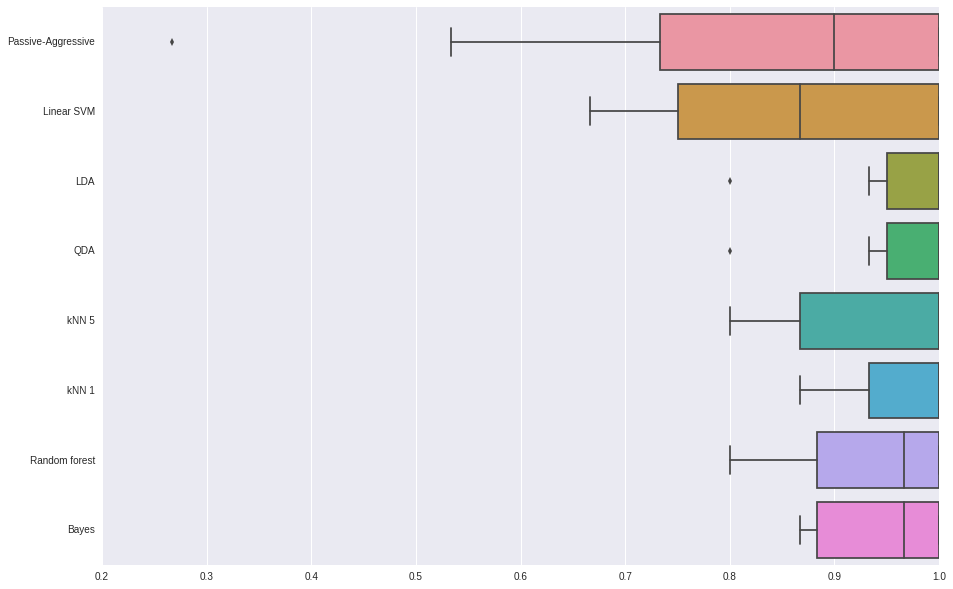

In [17]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=acc, orient="h", ax=ax)

#### Average training time visualization

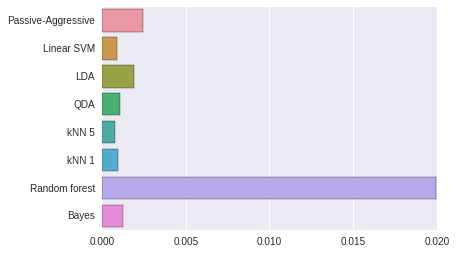

In [18]:
train_table = [x[2] for x in results]
pl = sns.barplot(y=est_names, x=train_table,  orient="h")

#### Average test time visualization

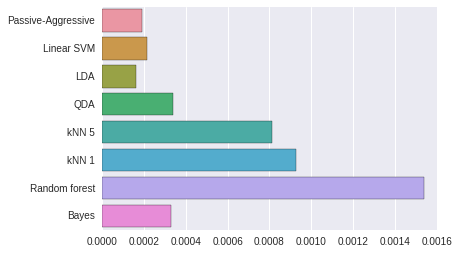

In [19]:
test_table = [x[3] for x in results]
sns.barplot(y=est_names, x=test_table,  orient="h")

#### Overview

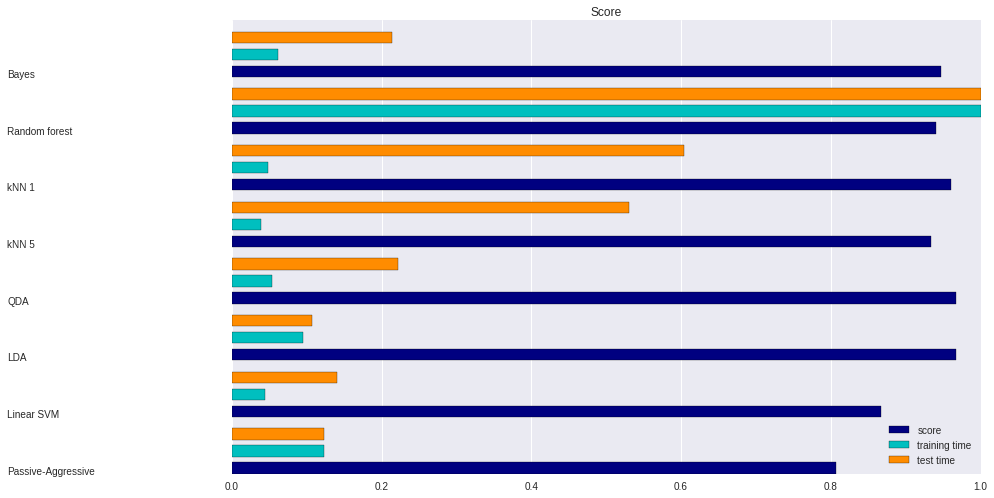

In [20]:
indices = np.arange(len(results))

results2 = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results2


training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(16, 7))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)


for i, c in zip(indices, est_names):
    plt.text(-.3, i, c)

plt.show()

## 4. Improve results

Based on previous point, I choose LDA algorithm. Firstly I will try skrinkage.

### Shrinkage

In [21]:
#shrinkage values
shrink = np.arange(0,0.2,0.01)

res = []
for i in shrink:
    res.append( spotCheckKFold(LinearDiscriminantAnalysis(solver='lsqr', shrinkage=i), name, kf) )

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.0,
              solver='lsqr', store_covariance=False, tol=0.0001)
train time: 0.002s
test time:  0.000s
accuracy:   0.967
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
              solver='lsqr', store_covariance=False, tol=0.0001)
train time: 0.003s
test time:  0.000s
accuracy:   0.967
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.02,
              solver='lsqr', store_covariance=False, tol=0.0001)
train time: 0.003s
test time:  0.000s
accuracy:   0.980
confusion matrix:
[[15]]

Bayes
___________________________________

/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


train time: 0.003s
test time:  0.000s
accuracy:   0.980
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None,
              shrinkage=0.040000000000000001, solver='lsqr',
              store_covariance=False, tol=0.0001)
train time: 0.002s
test time:  0.000s
accuracy:   0.980
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None,
              shrinkage=0.050000000000000003, solver='lsqr',
              store_covariance=False, tol=0.0001)
train time: 0.002s
test time:  0.000s
accuracy:   0.980
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None,
              shrinkage=0.059999999999999998, solver='lsqr',


/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


train time: 0.002s
test time:  0.000s
accuracy:   0.980
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None,
              shrinkage=0.089999999999999997, solver='lsqr',
              store_covariance=False, tol=0.0001)
train time: 0.002s
test time:  0.000s
accuracy:   0.980
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None,
              shrinkage=0.10000000000000001, solver='lsqr',
              store_covariance=False, tol=0.0001)
train time: 0.002s
test time:  0.000s
accuracy:   0.980
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.11,
              solver='lsqr', store_covariance=

/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


train time: 0.002s
test time:  0.000s
accuracy:   0.973
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None,
              shrinkage=0.14000000000000001, solver='lsqr',
              store_covariance=False, tol=0.0001)
train time: 0.002s
test time:  0.000s
accuracy:   0.973
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None,
              shrinkage=0.14999999999999999, solver='lsqr',
              store_covariance=False, tol=0.0001)
train time: 0.002s
test time:  0.000s
accuracy:   0.967
confusion matrix:
[[15]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.16,
              solver='lsqr', store_covariance=F

/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


train time: 0.002s
test time:  0.000s
accuracy:   0.960
confusion matrix:
[[ 0  0]
 [ 1 14]]

Bayes
________________________________________________________________________________
Training: 
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.19,
              solver='lsqr', store_covariance=False, tol=0.0001)
train time: 0.002s
test time:  0.000s
accuracy:   0.960
confusion matrix:
[[ 0  0]
 [ 1 14]]



/home/damian/opt/anaconda2/envs/py3k/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


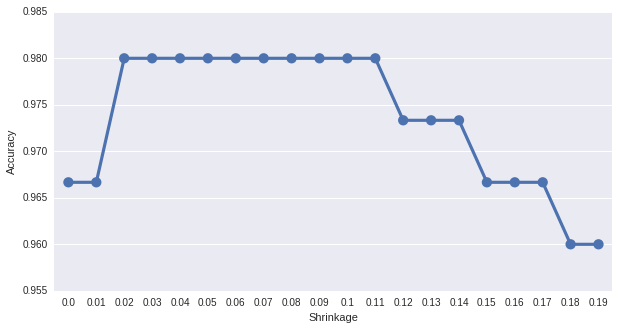

In [22]:
#accuracy scores in results
scores = [x[1] for x in res]
#plotting accuracy
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
p = sns.pointplot(x=shrink, y=scores, ax=ax)
p.set(xlabel='Shrinkage', ylabel='Accuracy')

<br/>Optimal classifier: <b>LDA</b> <br/>
Optimal solver: <b>'lsqr'</b><br/>
Optimal shrinkage: <b>0.07</b>
<br/>
Best average accuracy i 10-fold test: <b>0.98</b>
<br/><br/>

## 5. Final model

In [23]:
clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.07)
clf.fit(X, Y)
print(clf.score(X,Y))

0.98
